<a href="https://colab.research.google.com/github/Rashid-25/Python_Practice_beginner/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file manually

import pandas as pd
# Replace 'Sales_Data.xlsx' with the exact filename of the uploaded file
data = pd.read_excel('Sales_Data.xlsx')



Saving Sales_Data.xlsx to Sales_Data.xlsx
   OrderDate Month Region         City  Category         Product  Quantity  \
0 2020-01-01   Jan   East       Boston      Bars          Carrot        33   
1 2020-01-04   Jan   East       Boston  Crackers     Whole Wheat        87   
2 2020-01-07   Jan   West  Los Angeles   Cookies  Chocolate Chip        58   
3 2020-01-10   Jan   East     New York   Cookies  Chocolate Chip        82   
4 2020-01-13   Jan   East       Boston   Cookies       Arrowroot        38   

   UnitPrice  TotalPrice    Salesperson  
0       1.77       58.41   David Garcia  
1       3.49      303.63  Marc Williams  
2       1.87      108.46     Eric Jones  
3       1.87      153.34    Emily Moore  
4       2.18       82.84      Amy Brown  


In [5]:
# Explore the data
print(data.head())
print(data.info())
print(data.isnull().sum())

   OrderDate Month Region         City  Category         Product  Quantity  \
0 2020-01-01   Jan   East       Boston      Bars          Carrot        33   
1 2020-01-04   Jan   East       Boston  Crackers     Whole Wheat        87   
2 2020-01-07   Jan   West  Los Angeles   Cookies  Chocolate Chip        58   
3 2020-01-10   Jan   East     New York   Cookies  Chocolate Chip        82   
4 2020-01-13   Jan   East       Boston   Cookies       Arrowroot        38   

   UnitPrice  TotalPrice    Salesperson  
0       1.77       58.41   David Garcia  
1       3.49      303.63  Marc Williams  
2       1.87      108.46     Eric Jones  
3       1.87      153.34    Emily Moore  
4       2.18       82.84      Amy Brown  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderDate    122 non-null    datetime64[ns]
 1   Month        122 non-n

In [6]:
# Clean the data
data = data.dropna()  # Remove missing values
data = data.drop_duplicates()  # Remove duplicate rows

In [7]:
# 1. Filtering and summing sales by region
region_sales = data.groupby('Region')['TotalPrice'].sum().reset_index()
print("Sales by Region:")
print(region_sales)

Sales by Region:
  Region  TotalPrice
0   East    12116.69
1   West     5871.97


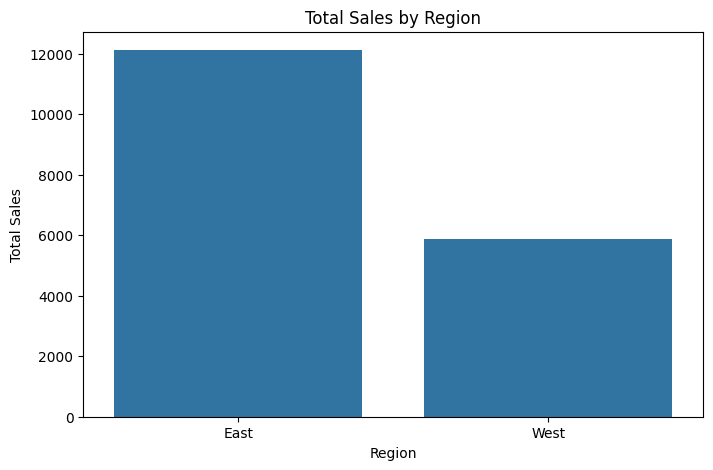

In [8]:
# Visualizing sales by region
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='TotalPrice', data=region_sales)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [9]:
# Summing sales by product
product_sales = data.groupby('Product')['TotalPrice'].sum().reset_index()
print("Sales by Product:")
print(product_sales)

Sales by Product:
          Product  TotalPrice
0       Arrowroot     2659.60
1          Banana       68.10
2            Bran     1333.31
3          Carrot     4347.12
4  Chocolate Chip     2098.14
5  Oatmeal Raisin     3638.04
6    Potato Chips     1256.97
7        Pretzels       85.05
8     Whole Wheat     2502.33


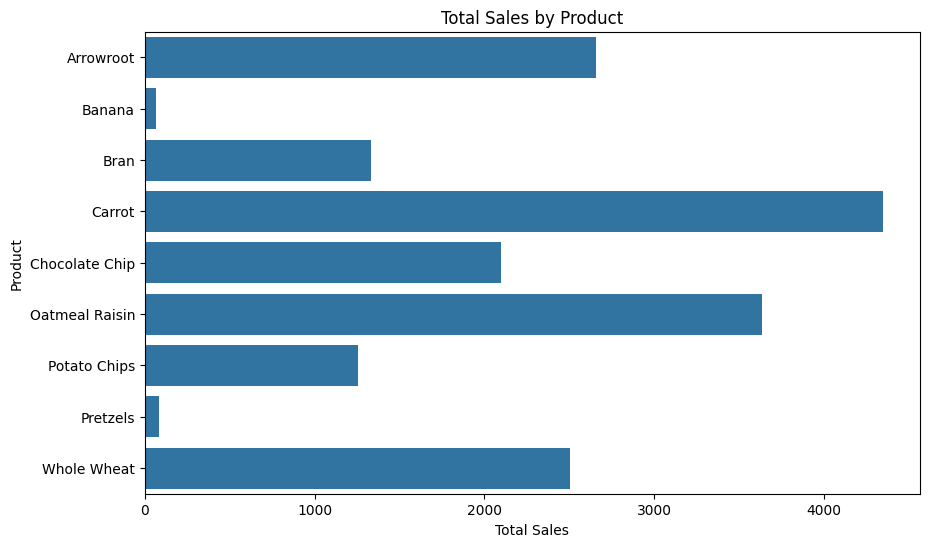

In [10]:
# Visualizing sales by product
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPrice', y='Product', data=product_sales)
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

In [11]:
# Summing sales by salesperson
salesperson_sales = data.groupby('Salesperson')['TotalPrice'].sum().reset_index()
print("Sales by Salesperson:")
print(salesperson_sales)


Sales by Salesperson:
     Salesperson  TotalPrice
0      Amy Brown     2303.76
1   David Garcia     1837.49
2    Emily Moore     3152.11
3     Eric Jones     1893.26
4  Marc Williams     4896.13
5     Sara Davis     1975.30
6   Stacy Peters     1930.61


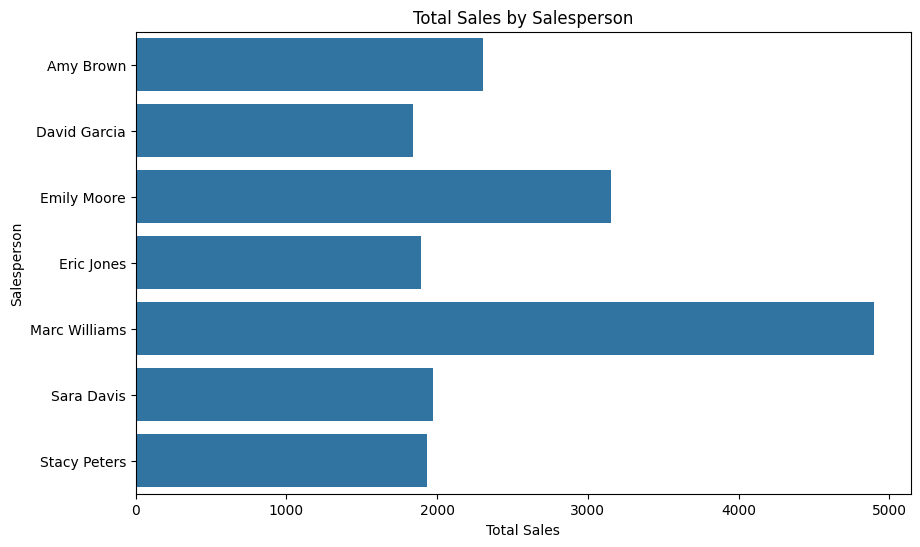

In [12]:
# Visualizing sales by salesperson
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPrice', y='Salesperson', data=salesperson_sales)
plt.title('Total Sales by Salesperson')
plt.xlabel('Total Sales')
plt.ylabel('Salesperson')
plt.show()


In [13]:
# Statistical Analysis
# Descriptive Statistics-Total Sales
print("Statistical Analysis-Descriptive Statistics- Total Price")
print(data['TotalPrice'].describe(), '\n')

Statistical Analysis-Descriptive Statistics- Total Price
count    122.000000
mean     147.448033
std      122.658266
min       35.400000
25%       78.030000
50%      107.970000
75%      161.007500
max      817.920000
Name: TotalPrice, dtype: float64 



In [14]:
# Descriptive Statistics-Sales Persons
print("Statistical Analysis-Descriptive Statistics- Sales persons")
salesperson_summary = data.groupby('Salesperson')['TotalPrice'].describe()
print(salesperson_summary,'\n')

Statistical Analysis-Descriptive Statistics- Sales persons
               count        mean         std    min      25%      50%  \
Salesperson                                                             
Amy Brown       17.0  135.515294  119.124920  37.80  79.6500  104.700   
David Garcia    12.0  153.124167  132.254046  58.41  76.9950  107.745   
Emily Moore     22.0  143.277727  107.325024  35.40  70.1550  114.705   
Eric Jones      17.0  111.368235   71.052241  36.45  70.8000   87.200   
Marc Williams   25.0  195.845200  174.674543  61.04  93.8100  121.550   
Sara Davis      12.0  164.608333  132.125858  42.48  69.4125  151.940   
Stacy Peters    17.0  113.565294   54.258938  48.72  69.8000   95.370   

                   75%     max  
Salesperson                     
Amy Brown      134.640  548.12  
David Garcia   154.185  541.62  
Emily Moore    187.000  516.66  
Eric Jones     140.250  303.02  
Marc Williams  192.930  817.92  
Sara Davis     191.840  520.01  
Stacy Peters   160.

In [15]:
# Correlation Analysis
# Calculate the correlation between Quantity and TotalPrice
print('Correlation-Quantity & Total Price:')
correlation = data['Quantity'].corr(data['TotalPrice'])
# Print the correlation
print(f"Correlation between Quantity and TotalPrice: {correlation}\n")

Correlation-Quantity & Total Price:
Correlation between Quantity and TotalPrice: 0.9321983512651089



Visualization of Correlation - Quantity & Total Price


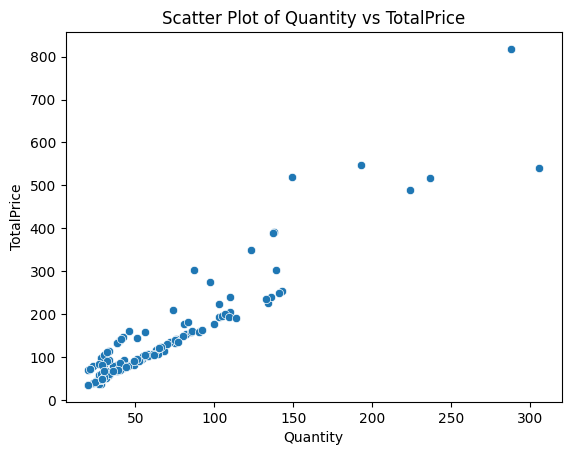

In [16]:
# Scatter plot to visualize the correlation
print('Visualization of Correlation - Quantity & Total Price')
sns.scatterplot(x=data['Quantity'], y=data['TotalPrice'])
plt.title('Scatter Plot of Quantity vs TotalPrice')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.show()

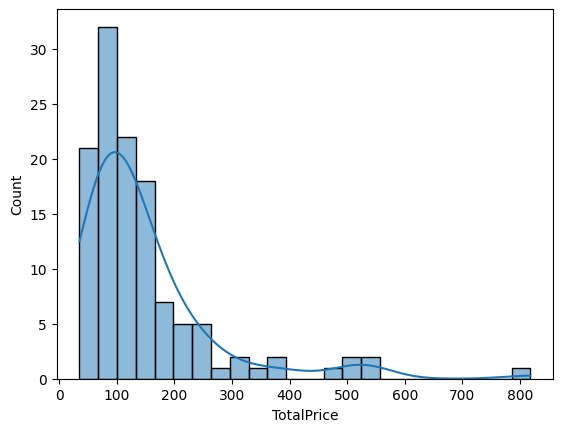

In [17]:
# Sales Distribution Analysis
sns.histplot(data['TotalPrice'], kde=True)
plt.show()